In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import urllib
import json
import datetime as dt
import pandas as pd
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
API_key=<Your api key >
url_string = "https://www.quandl.com/api/v3/datasets/NSE/TATAGLOBAL.json?api_key=%s"%(API_key)



In [0]:
with urllib.request.urlopen(url_string) as url:
    data = json.loads(url.read().decode())

In [0]:
Date=[]
Open=[]
High=[]
Low=[]
Last=[]
Close=[]
trade=[]
turnover=[]
for i,j,k,l,m,n,o,p in data['dataset']['data']:
  Date.append(i)
  Open.append(j)
  High.append(k)
  Low.append(l)
  Last.append(m)
  Close.append(n)
  trade.append(o)
  turnover.append(p)


In [0]:
df=pd.DataFrame([Date,Open,High,Low,Last,Close,trade,turnover]).T

In [0]:
df.columns=["Date","Open","High","Low","Last","Close","Total Trade Quantity","Turnover (Lacs)"]

In [0]:
df.Date=df.Date.apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [0]:
#convert to csv file
df.to_csv('Tata_Global_Baverages_stock_market.csv',index=False)

In [0]:
#read csv file
df=pd.read_csv('/content/Tata_Global_Baverages_stock_market.csv')

In [75]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
...,...,...,...,...,...,...,...,...
2095,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
2096,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2097,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2098,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17


In [0]:
df.index=df.Date

In [11]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.6,214.9,210,213.5,213.8,1.21318e+06,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.9,210.55,210.05,2.09655e+06,4433.5
2019-01-02,2019-01-02,219,220.35,213.6,214.2,214.6,1.08178e+06,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.1,716275,1571.63
2018-12-31,2018-12-31,222,223.65,218.85,219.55,219.4,965858,2131.09
...,...,...,...,...,...,...,...,...
2010-07-27,2010-07-27,117.6,119.5,112,118.8,118.65,586100,694.98
2010-07-26,2010-07-26,120.1,121,117.1,117.1,117.6,658440,780.01
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31


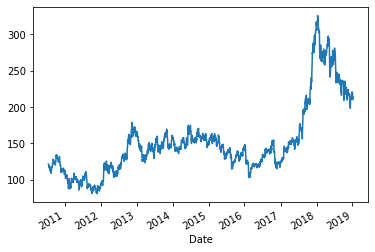

In [12]:
df['Close'].plot()

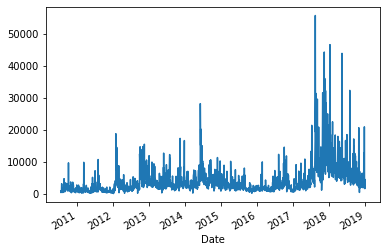

In [13]:
df['Turnover (Lacs)'].plot()

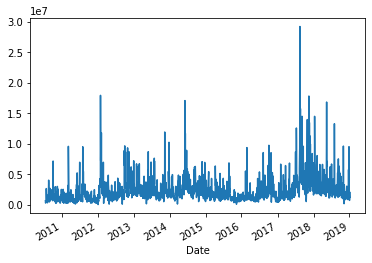

In [14]:
df['Total Trade Quantity'].plot()

loss and profit are usually determined by closing value of stock market

so we only do focus on close feature

create new dataset

In [0]:

data=df.sort_index(ascending=True,axis=0)
new_df=pd.DataFrame(index=range(0,df.shape[0]),columns=['Date','Close'])


In [0]:
for i in range(0,len(data)):
  new_df['Date'][i]=data['Date'][i]
  new_df['Close'][i]=data['Close'][i]

In [0]:
new_df.index=new_df.Date

In [0]:

new_df=new_df[:'2018']
new_df.drop('Date',axis=1,inplace=True)


we had only 4 days values of the year 2019 so we will not include this data

In [0]:

train=new_df[:'2017']
valid=new_df['2018']

we took 2018 year data for validation and remain for training data

In [20]:
print('training size',train.shape)
print('validation size',valid.shape)

training size (1850, 1)
validation size (246, 1)


In [21]:
!pip install pyramid-arima

first we will go for arima

In [22]:

import statsmodels.api as sm
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [23]:
model=auto_arima(train,trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast=model.predict(n_periods=len(valid))


Fit ARIMA: order=(2, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=9130.922, BIC=9164.053, Fit time=3.090 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=10439.763, BIC=10450.806, Fit time=0.069 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=9881.349, BIC=9897.915, Fit time=0.156 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=9137.483, BIC=9154.049, Fit time=0.737 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=9133.150, BIC=9160.760, Fit time=1.703 seconds
Fit ARIMA: order=(3, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=9131.195, BIC=9169.848, Fit time=3.715 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=9140.433, BIC=9168.043, Fit time=1.415 seconds
Fit ARIMA: order=(2, 2, 3) seasonal_order=(0, 0, 0, 1); AIC=9140.128, BIC=9178.781, Fit time=3.532 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=9138.434, BIC=9160.521, Fit time=1.601 seconds
Fit ARIMA: order=(3, 2, 3) seasonal

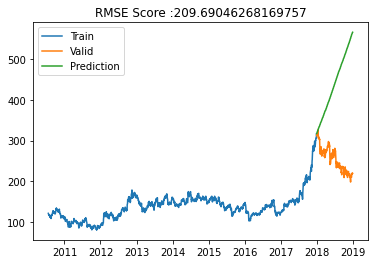

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.title('RMSE Score :{}'.format(np.sqrt(mean_squared_error(valid,forecast))))
plt.show()

we can see that our prediction cought the trend but doesn't give me better result

In [25]:
# lets use Prophet which is established by Facebook
! pip install Prophet

In [0]:
#preparing data

data=df.sort_index(ascending=True,axis=0)
new_df=pd.DataFrame(index=range(0,df.shape[0]),columns=['Date','Close'])

for i in range(0,len(data)):
  new_df['Date'][i]=data['Date'][i]
  new_df['Close'][i]=data['Close'][i]




In [0]:
new_df.rename({'Date':'ds','Close':'y'},axis=1,inplace=True)

In [0]:
new_df=new_df[:2096]

In [0]:
train=new_df[:1850]
valid=new_df[1850:]

In [30]:
print('training size',train.shape)
print('validation size',valid.shape)

training size (1850, 2)
validation size (246, 2)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


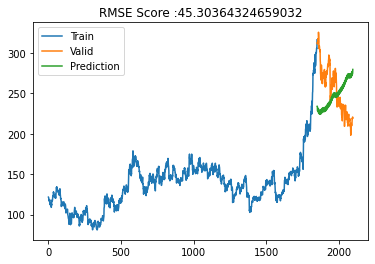

In [31]:
from fbprophet import Prophet

model=Prophet()
model.fit(train)
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))

forecast=model.predict(close_prices)

valid_forecast=forecast['yhat'][1850:]

#plot the predictions for validation set
plt.plot(train['y'], label='Train')
plt.plot(valid['y'], label='Valid')
plt.plot(valid_forecast, label='Prediction')
plt.legend()
plt.title('RMSE Score :{}'.format(np.sqrt(mean_squared_error(valid['y'],valid_forecast))))
plt.show()


we can see it gives better result as compare to the ARIMA

In [0]:
# now we will go for LSTM which is a deep learning concept

In [65]:
from keras.layers import LSTM,Dense,Flatten,Dropout,Bidirectional
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123,121.05,121.1,121.55,658666,803.56
2010-07-22,2010-07-22,120.3,122,120.25,120.75,120.9,293312,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2010-07-26,120.1,121,117.1,117.1,117.6,658440,780.01
2010-07-27,2010-07-27,117.6,119.5,112,118.8,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2018-12-31,2018-12-31,222,223.65,218.85,219.55,219.4,965858,2131.09
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.1,716275,1571.63
2019-01-02,2019-01-02,219,220.35,213.6,214.2,214.6,1.08178e+06,2340.31


In [0]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [0]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [0]:
new_data=new_data[:'2018']
train=new_data[:'2017']
valid=new_data['2018']

In [0]:
#creating train and test sets
dataset = new_data.values

In [0]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [0]:

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train.shape,y_train.shape

((1790, 60), (1790,))

In [68]:

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=28, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/10
 - 20s - loss: 0.0037
Epoch 2/10
 - 18s - loss: 5.5743e-04
Epoch 3/10
 - 18s - loss: 4.8776e-04
Epoch 4/10
 - 18s - loss: 4.3177e-04
Epoch 5/10
 - 17s - loss: 3.8678e-04
Epoch 6/10
 - 18s - loss: 3.6155e-04
Epoch 7/10
 - 18s - loss: 3.4421e-04
Epoch 8/10
 - 18s - loss: 3.5551e-04
Epoch 9/10
 - 17s - loss: 3.3940e-04
Epoch 10/10
 - 17s - loss: 2.9228e-04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'RMSE Score :7.760459')

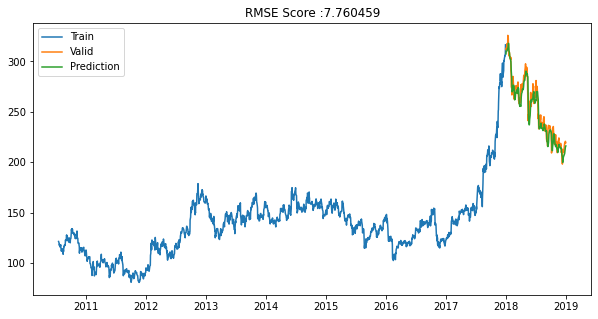

In [69]:
#for plotting
plt.figure(figsize=(10,5))
valid['Predictions'] = closing_price
plt.plot(train['Close'],label='Train')
plt.plot(valid['Close'],label='Valid')
plt.plot(valid['Predictions'],label='Prediction')
plt.legend()

plt.title('RMSE Score :{:2f}'.format(np.sqrt(mean_squared_error(valid['Close'],valid['Predictions']))))

In [0]:
# it look like we cought almost the same trend with RMSE 7.